# Gathering data


In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import re

In [2]:
df_twitter  = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter .head(20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_image = pd.read_csv('image-predictions.tsv', sep='\t' )


In [4]:
list_of_tweets = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        print(type(line))
        tweet = json.loads(line)
        print(type(tweet))
        break

<class 'str'>
<class 'dict'>


In [5]:
list_of_tweets = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        list_of_tweets.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
tweet_json = pd.DataFrame(list_of_tweets)
tweet_json.head(15)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [6]:
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df_twitter ['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [7]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))


The list of tweets 2354
The list of tweets no found 2356


In [8]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [9]:
tweet_json.head()


,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assessing data


In [10]:
df_twitter.head(40)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_image


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
df_image


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
tweet_json


,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [14]:
df_twitter.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1170,736225175608430592,https://pbs.twimg.com/media/CjeY5DKXEAA3WkD.jpg,1,Labrador_retriever,0.399217,True,West_Highland_white_terrier,0.137710,True,cocker_spaniel,0.062033,True
507,676089483918516224,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,1,bull_mastiff,0.743808,True,boxer,0.106697,True,American_Staffordshire_terrier,0.042335,True
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
1996,874680097055178752,https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg,1,Labrador_retriever,0.836052,True,Staffordshire_bullterrier,0.047069,True,beagle,0.036007,True
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
1556,793210959003287553,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,doormat,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,Labrador_retriever,0.320012,True,Ibizan_hound,0.208172,True,Saluki,0.078975,True
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False


In [18]:
sum(df_image.jpg_url.duplicated())

66

In [19]:
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
tweet_json.sample(10)

,favorite_count,retweet_count,tweet_id
1882,3240,949,674800520222154752
270,24926,5991,841077006473256960
1783,2040,886,677644091929329666
2239,222,59,667915453470232577
1940,1114,325,673711475735838725
1987,1343,533,672828477930868736
497,4968,513,813130366689148928
296,17480,2731,837110210464448512
678,10875,3244,789137962068021249
1305,2698,727,707315916783140866


# Quality Issue

1-Have only tweets

2-Delete columns that won't use

3-chamge timestamp to D-M-Y

4-Remove [+0000] from Timestamps

5-Transform [rating_denominator,rating_numerator] from integar to float

6-Column [name] have [None,a,an] and confert them to [Nan]

7-Ceate column coled 'rating'

8- Drop [jpg_url] duplicated

9-convert (tweet_id)to string


# Tidiness

1-Dog types issue

2-All tables should be in one table


#  Storing, Analyzing, and Visualizing Data

1-Most Rated Dog Breed

2-Most Common Names

3-Tweet Count vs. Retweet Count


In [22]:
#copy 
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
tweet_json_clean = tweet_json.copy()

1-Have only tweets

In [23]:
#code
df_twitter_clean = df_twitter_clean[np.isnan(df_twitter_clean.retweeted_status_id)]

In [24]:
#Test
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [25]:
#CODE: Delete columns no needed
df_twitter_clean = df_twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [26]:
#Test
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


2-Delete columns that won't use


In [27]:
#CODE: Delete columns no needed
df_twitter_clean = df_twitter_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'expanded_urls'], 1)

In [28]:
#Test
list(df_twitter_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

3-chamge timestamp to D-M-Y

In [31]:
#CODE
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])
df_twitter_clean['year'] = df_twitter_clean['timestamp'].dt.year
df_twitter_clean['month'] = df_twitter_clean['timestamp'].dt.month
df_twitter_clean['day'] = df_twitter_clean['timestamp'].dt.day


In [32]:
#CODE
df_twitter_clean = df_twitter_clean.drop('timestamp', 1)


In [33]:
#TEST
df_twitter_clean.head(5)


,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,7,29


4-Remove [+0000] from Timestamps

In [ ]:
#code
df_twitter_clean['timestamp'] = df_twitter_clean['timestamp'].str.slice(start=0, stop=-6) 

In [35]:
#Test
df_twitter_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,7,29


In [37]:
#Test
list(df_twitter_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'month',
 'day']

5-Transform [rating_denominator,rating_numerator] from integar to float


In [38]:
#Code
df_twitter_clean['rating_denominator'] = df_twitter_clean['rating_denominator'].astype(float)


In [39]:
#Code
df_twitter_clean['rating_numerator'] = df_twitter_clean['rating_numerator'].astype(float)


In [40]:
#Test
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 220.9+ KB


6-Column [name] have [None,a,an] and confert them to [Nan]

In [41]:
#show the column of name
df_twitter_clean.name.value_counts()

None          680
a              55
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Winston         8
the             8
Lola            8
Toby            7
Daisy           7
Bella           6
Bo              6
Bailey          6
an              6
Jax             6
Oscar           6
Stanley         6
Koda            6
Louis           5
Scout           5
Rusty           5
Leo             5
Buddy           5
Milo            5
Dave            5
Chester         5
             ... 
Dug             1
Angel           1
Tilly           1
Schnitzel       1
Emmie           1
Buckley         1
Timofy          1
Ed              1
Mollie          1
Lucky           1
Mike            1
Crawford        1
Geno            1
Chelsea         1
Miley           1
Pherb           1
Balto           1
Kuyu            1
Bronte          1
Lambeau         1
Hurley          1
William         1
Emmy            1
Rose            1
Christoper

In [42]:
#code
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_twitter_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df_twitter_clean.loc[index,'name'] = df_twitter_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df_twitter_clean.loc[index,'name'] = df_twitter_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'None':
            c_name = re.findall(pattern_2, row['text'])[0]
            df_twitter_clean.loc[index,'name'] = df_twitter_clean.loc[index,'name'].replace('None', c_name)
                           

    except IndexError:
        df_twitter_clean.loc[index,'name'] = np.nan
#Test
            
df_twitter_clean.name.value_counts(dropna = False)

NaN           708
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
the             8
Lola            8
Daisy           7
Toby            7
Koda            6
Bo              6
Bailey          6
Stanley         6
Jax             6
Bella           6
Oscar           6
Buddy           5
Louis           5
Leo             5
Dave            5
Milo            5
Scout           5
Rusty           5
Bentley         5
Chester         5
Reggie          4
             ... 
Angel           1
Tilly           1
Schnitzel       1
Timofy          1
Ed              1
Sojourner       1
Pherb           1
Mingus          1
Gerbald         1
Yukon           1
Mollie          1
Lucky           1
Mike            1
Crawford        1
Geno            1
Chelsea         1
Miley           1
Balto           1
Vinscent        1
Kuyu            1
Bronte          1
Lambeau         1
Hurley          1
William         1
Emmy      

7-Ceate column coled 'rating'

In [43]:
#code
df_twitter_clean['rating'] = 10 * df_twitter_clean['rating_numerator'] / df_twitter_clean['rating_denominator'].astype(float)

#TEST
df_twitter_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rating
780,775733305207554048,This is Anakin. He strives to reach his full d...,11.0,10.0,Anakin,doggo,None,None,None,2016,9,13,11.0
238,847116187444137987,Unbelievable... We. Only. Rate. Dogs. Please s...,11.0,10.0,NaN,None,None,None,None,2017,3,29,11.0
719,783391753726550016,Meet Godi. He's an avid beachgoer and part tim...,13.0,10.0,Godi,None,None,None,None,2016,10,4,13.0
1464,694356675654983680,This pupper only appears through the hole of a...,10.0,10.0,NaN,None,None,pupper,None,2016,2,2,10.0
1457,695095422348574720,This is just a beautiful pupper good shit evol...,12.0,10.0,just,None,None,pupper,None,2016,2,4,12.0


8- Drop [jpg_url] duplicated


In [44]:
#show duplicate in jpg_url
sum(df_image_clean['jpg_url'].duplicated())

66

In [45]:
#code
df_image_clean = df_image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(df_image_clean['jpg_url'].duplicated())

0

In [46]:
#Test
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


9-convert (tweet_id)to string 

In [48]:
#CODE
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(object)

In [49]:
#CODE
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(object)


In [50]:
#CODE
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(object)


# Tidiness

1-Dog types issue

In [52]:
#code
df_twitter_clean['doggo'].replace('None' ,'' , True)
df_twitter_clean['puppo'].replace('None' ,'' , True)
df_twitter_clean['floofer'].replace('None' ,'' , True)
df_twitter_clean['pupper'].replace('None' ,'' , True)


In [53]:
#Code
df_twitter_clean['dog_type'] = df_twitter_clean['doggo'] + df_twitter_clean['puppo'] + df_twitter_clean['floofer']+ df_twitter_clean['pupper']



In [54]:
#Code
df_twitter_clean = df_twitter_clean.drop('doggo', 1)
df_twitter_clean = df_twitter_clean.drop('puppo', 1)
df_twitter_clean = df_twitter_clean.drop('floofer', 1)
df_twitter_clean = df_twitter_clean.drop('pupper', 1)


In [55]:
#Test
df_twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1467 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
rating                2175 non-null float64
dog_type              2175 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 266.9+ KB


In [56]:
#Test
df_twitter_clean.dog_type.value_counts()


                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_type, dtype: int64

In [57]:
#Code
df_twitter_clean.dog_type.replace('', np.nan, True)



In [58]:
#Test
df_twitter_clean.dog_type.value_counts()


pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_type, dtype: int64

In [59]:
#Code
df_twitter_clean.loc[df_twitter_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo,pupper'
df_twitter_clean.loc[df_twitter_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo,floofer'
df_twitter_clean.loc[df_twitter_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo,puppo'


In [60]:
#Test
df_twitter_clean.dog_type.value_counts()


pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_type, dtype: int64

2-All tables should be in one table


In [61]:
#CODE
df_twitter1 = pd.merge(df_twitter_clean, 
                      df_image_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              1928 non-null object
text                  1928 non-null object
rating_numerator      1928 non-null float64
rating_denominator    1928 non-null float64
name                  1368 non-null object
year                  1928 non-null int64
month                 1928 non-null int64
day                   1928 non-null int64
rating                1928 non-null float64
dog_type              295 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null float64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null object
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null object
p3                    1928 non-null object
p3_conf               1928 non-null float64
p3_dog                1928 non

In [62]:
#CODE
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 23 columns):
tweet_id              1928 non-null object
text                  1928 non-null object
rating_numerator      1928 non-null float64
rating_denominator    1928 non-null float64
name                  1368 non-null object
year                  1928 non-null int64
month                 1928 non-null int64
day                   1928 non-null int64
rating                1928 non-null float64
dog_type              295 non-null object
jpg_url               1928 non-null object
img_num               1928 non-null float64
p1                    1928 non-null object
p1_conf               1928 non-null float64
p1_dog                1928 non-null object
p2                    1928 non-null object
p2_conf               1928 non-null float64
p2_dog                1928 non-null object
p3                    1928 non-null object
p3_conf               1928 non-null float64
p3_dog                1928 non

In [63]:
#TEST
df_twitter['rating_numerator'].value_counts()

12.0      431
10.0      411
11.0      380
13.0      241
9.0       151
8.0        95
7.0        52
5.0        33
6.0        32
14.0       32
3.0        19
4.0        16
2.0         9
1.0         5
0.0         2
84.0        1
24.0        1
27.0        1
143.0       1
420.0       1
50.0        1
80.0        1
45.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
99.0        1
121.0       1
204.0       1
Name: rating_numerator, dtype: int64

# Storing, Analyzing, and Visualizing Data

In [64]:
#CODE
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

1-Most Rated Dog Breed

In [65]:
#Show dog_type value_counts
df_twitter['dog_type'].value_counts()

pupper           199
doggo             59
puppo             21
doggo,pupper       7
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_type, dtype: int64

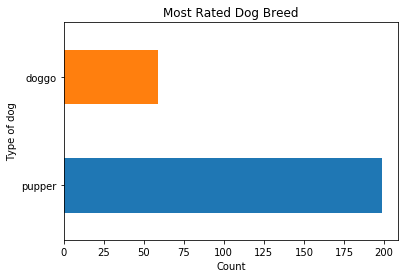

In [66]:
#CODE
# Histogram to visualize dog breeeds
dog_breed = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

dog_breed['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Type of dog');

fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

2-Most Common Names

In [67]:
#Show name value counts
df_twitter.name.value_counts()


Charlie       11
Lucy          10
Oliver        10
Cooper        10
Sadie          8
Penny          8
Winston        8
Tucker         8
Toby           7
Daisy          7
the            7
Koda           6
Lola           6
Bella          6
Stanley        6
Jax            6
Leo            5
Chester        5
Buddy          5
Louis          5
Oscar          5
Phil           4
Finn           4
Chip           4
Oakley         4
one            4
George         4
Bo             4
Clark          4
Winnie         4
              ..
Blue           1
Horace         1
Hanz           1
Kona           1
Noah           1
Emmie          1
Napolean       1
Buckley        1
Jo             1
Kloey          1
Mingus         1
Gerbald        1
Lucky          1
Crawford       1
Geno           1
Miley          1
Kuyu           1
Bronte         1
Lambeau        1
Hurley         1
William        1
Emmy           1
Rose           1
Christoper     1
Ralphson       1
Longfellow     1
Vinscent       1
Sojourner     

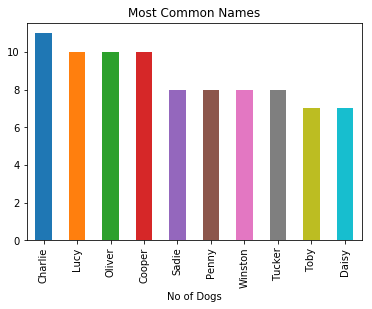

In [68]:
#CODE
df_twitter.name.value_counts()[0:10].plot('bar', title='Most Common Names').set_xlabel("No of Dogs");
fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight');

3-Tweet Count vs. Retweet Count

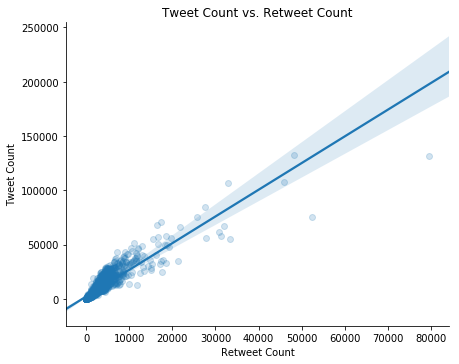

In [69]:
#CODE
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Tweet Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Tweet Count');
fig = plt.gcf() 
fig.savefig('output3.png',bbox_inches='tight');